## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [3]:
data.isna().sum()

Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [4]:
data = data.dropna() #так мы удалили все пропущенные значения

In [5]:
data["Island"].nunique()

3

В наборе данных присутствуют категориальные признаки, поэтому надо будет их закодировать. Начнем с острова. Их три, поэтому можно использовать LabelEncoder, так как это номинальная переменная, которая не показывает порядковость.

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(data["Island"])

In [8]:
data["Island"] = encoded_data

In [9]:
data

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,1,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,1,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,0,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,1,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,0,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,1,Yes,382,47.6,18.3,195.0,3850.0,FEMALE,8.83502,-24.65859
340,Adelie,2,Yes,382,39.7,18.4,190.0,3900.0,MALE,9.29808,-25.23453
341,Adelie,0,Yes,16,38.6,17.2,199.0,3750.0,FEMALE,8.77322,-26.48973
342,Gentoo,0,Yes,392,46.6,14.2,210.0,4850.0,FEMALE,8.38289,-26.86352


Теперь у нас 0 - остров Biscoe, 1 - Остров Dream, 2 - остров Torgersen

Clutch Completion мы закодируем в OneHot, так как здесь ответы либо Yes либо No, что соответствует булевым значениям

In [10]:
data = pd.get_dummies(data, columns=['Clutch Completion'], drop_first=True) 

Значения пола, мы закодируем при помощи значений 0 и 1, где 0 - мужской пол, а 1 - женский пол, так как это бинарная категориальная переменная, таким методом это будет сделать легче всего

In [11]:
data["Sex"] = data["Sex"].replace("MALE", 0)
data["Sex"] = data["Sex"].replace("FEMALE", 1)

In [12]:
data.groupby("Sex")["Sex"].count()


Sex
0    161
1    163
.      1
Name: Sex, dtype: int64

In [13]:
data[data["Sex"] == "."].index

Index([41], dtype='int64')

In [14]:
data = data.drop(41)

In [15]:
data

,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Clutch Completion_Yes
0,Chinstrap,1,382,50.9,19.1,196.0,3550.0,0,10.02372,-24.86594,True
1,Chinstrap,1,741,45.2,17.8,198.0,3950.0,1,8.88942,-24.49433,True
2,Gentoo,0,744,46.5,13.5,210.0,4550.0,1,7.99530,-25.32829,True
3,Chinstrap,1,10,45.2,16.6,191.0,3250.0,1,9.62357,-24.78984,True
4,Gentoo,0,13,48.4,14.4,203.0,4625.0,1,8.16582,-26.13971,True
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,1,382,47.6,18.3,195.0,3850.0,1,8.83502,-24.65859,True
340,Adelie,2,382,39.7,18.4,190.0,3900.0,0,9.29808,-25.23453,True
341,Adelie,0,16,38.6,17.2,199.0,3750.0,1,8.77322,-26.48973,True
342,Gentoo,0,392,46.6,14.2,210.0,4850.0,1,8.38289,-26.86352,True


Теперь 0 - мужской пол, 1 - женский пол

Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
encoder = OrdinalEncoder(categories=[['Chinstrap', 'Gentoo', 'Adelie']])
encoded_data = encoder.fit_transform(data[['Species']])

In [18]:
data["Species"] = encoded_data

In [19]:
data

,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Clutch Completion_Yes
0,0.0,1,382,50.9,19.1,196.0,3550.0,0,10.02372,-24.86594,True
1,0.0,1,741,45.2,17.8,198.0,3950.0,1,8.88942,-24.49433,True
2,1.0,0,744,46.5,13.5,210.0,4550.0,1,7.99530,-25.32829,True
3,0.0,1,10,45.2,16.6,191.0,3250.0,1,9.62357,-24.78984,True
4,1.0,0,13,48.4,14.4,203.0,4625.0,1,8.16582,-26.13971,True
...,...,...,...,...,...,...,...,...,...,...,...
339,0.0,1,382,47.6,18.3,195.0,3850.0,1,8.83502,-24.65859,True
340,2.0,2,382,39.7,18.4,190.0,3900.0,0,9.29808,-25.23453,True
341,2.0,0,16,38.6,17.2,199.0,3750.0,1,8.77322,-26.48973,True
342,1.0,0,392,46.6,14.2,210.0,4850.0,1,8.38289,-26.86352,True


Теперь разделим данные на целевую переменную и признаки

In [20]:
X = data.drop(["Species"], axis=1)
y = data["Species"]

In [21]:
X.head()

,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Clutch Completion_Yes
0,1,382,50.9,19.1,196.0,3550.0,0,10.02372,-24.86594,True
1,1,741,45.2,17.8,198.0,3950.0,1,8.88942,-24.49433,True
2,0,744,46.5,13.5,210.0,4550.0,1,7.99530,-25.32829,True
3,1,10,45.2,16.6,191.0,3250.0,1,9.62357,-24.78984,True
4,0,13,48.4,14.4,203.0,4625.0,1,8.16582,-26.13971,True


In [22]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Species, dtype: float64

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
np.random.seed(4)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=4)

In [26]:
X_train

,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Clutch Completion_Yes
149,1,736,45.4,18.7,188.0,3525.0,1,8.64701,-24.62717,True
5,0,22,48.1,15.1,209.0,5500.0,0,8.45738,-26.22664,True
90,1,10,49.3,19.9,203.0,4050.0,0,9.88809,-24.59513,True
35,2,9,35.7,17.0,189.0,3350.0,1,8.96436,-23.90309,True
119,1,753,39.5,16.7,178.0,3250.0,1,9.69756,-25.11223,True
...,...,...,...,...,...,...,...,...,...,...
52,0,387,45.2,16.4,223.0,5950.0,0,8.19749,-26.65931,True
296,0,392,49.6,15.0,216.0,4750.0,0,8.26548,-26.76990,True
86,2,750,42.5,20.7,197.0,4500.0,0,8.67538,-25.13993,True
303,0,392,50.1,15.0,225.0,5000.0,0,8.50153,-26.61414,True


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(X_train[["Flipper Length (mm)", "Body Mass (g)"]])
X_train_scaled = scaler.transform(X_train[["Flipper Length (mm)", "Body Mass (g)"]])
X_test_scaled = scaler.transform(X_test[["Flipper Length (mm)", "Body Mass (g)"]])


In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
k_range = [1,3,5,10,15,25]

for k in k_range:   
    clf = KNeighborsClassifier(n_neighbors=k, p=2, n_jobs=10)
    clf.fit(X_train_scaled, y_train)
    y_predicted = clf.predict(X_test_scaled)
    print(f"Accuracy is for k = {k}: ", np.mean(y_test == y_predicted))

Accuracy is for k = 1:  0.7755102040816326
Accuracy is for k = 3:  0.7857142857142857
Accuracy is for k = 5:  0.8367346938775511
Accuracy is for k = 10:  0.7959183673469388
Accuracy is for k = 15:  0.8367346938775511
Accuracy is for k = 25:  0.8061224489795918


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [31]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

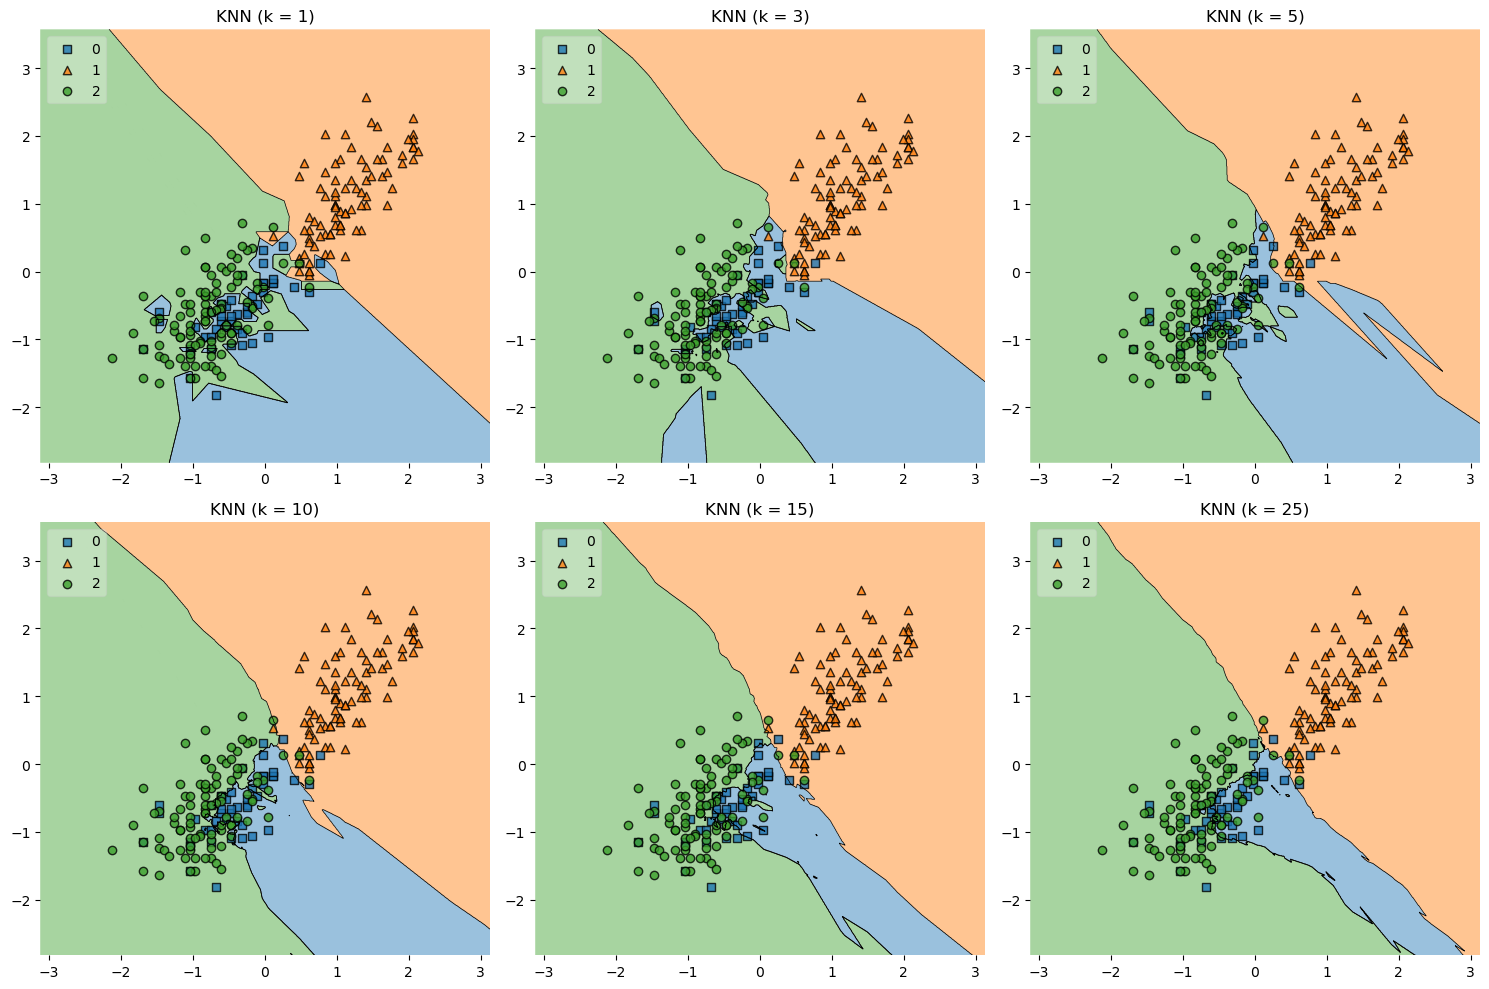

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn.neighbors import KNeighborsClassifier

y_train_int = y_train.to_numpy().astype(np.int_)

gs = gridspec.GridSpec(2, 3)  
fig = plt.figure(figsize=(15, 10))



k_range = [1, 3, 5, 10, 15, 25]


for k, (i, j) in zip(k_range, itertools.product(range(2), range(3))):
    
    ax = plt.subplot(gs[i, j])
    
    
    clf = KNeighborsClassifier(n_neighbors=k, p=2)
    clf.fit(X_train_scaled, y_train_int)
    
    
    plot_decision_regions(
        X=X_train_scaled, 
        y=y_train_int, 
        clf=clf, 
        legend=2,
        ax=ax  
    )
    
    
    ax.set_title(f"KNN (k = {k})")


plt.tight_layout()
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

На основе полученных значений доли верных ответов (accuracy) и анализа графиков можно сделать следующие выводы:


Accuracy is for k = 1:  0.7755102040816326

Accuracy is for k = 3:  0.7857142857142857

Accuracy is for k = 5:  0.8367346938775511

Accuracy is for k = 10:  0.7959183673469388

Accuracy is for k = 15:  0.8367346938775511

Accuracy is for k = 25:  0.8061224489795918



При малых значениях k k = 1 и  k = 3  наблюдается явное переобучение. Это видно по тому, что границы между классами выглядят очень изрезанными и сложными, что указывает на то, что модель слишком сильно подстраивается под тренировочные данные, включая шум и выбросы.

При k = 10  границы между классами становятся более гладкими и логичными, без лишних "островов" или сложных изгибов. Это говорит о том, что модель лучше обобщает данные и меньше подвержена переобучению.


Хотя точность при k = 10 (**79.59%**) не является самой высокой (максимальная точность достигается при k = 5  и k = 15 , анализ графиков показывает, что k = 10 является наиболее сбалансированным вариантом. Границы выглядят более естественными, и модель лучше справляется с обобщением на новых данных.


- **Переобучение** наблюдается при малых значениях k (1 и 3), так как границы между классами слишком сложные и изрезанные.
- **Оптимальным** кажется значение \( k = 10 \), так как границы выглядят более гладкими и логичными, а точность остается на приемлемом уровне (**~80%**). Хотя точность при \( k = 5 \) и \( k = 15 \) выше, \( k = 10 \) лучше балансирует между точностью и способностью модели обобщать данные.

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

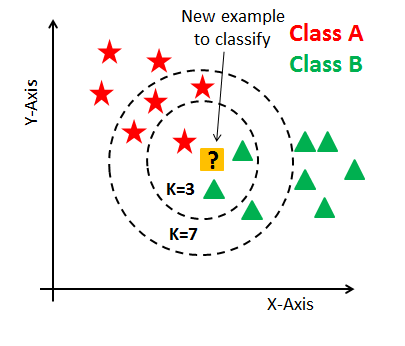

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [37]:
from collections import Counter

import numpy as np
from collections import Counter



class KNN:
    def __init__(self, k: int):
        if k <= 0:
            raise ValueError("k должно быть положительным числом.")
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        if X.shape[0] != y.shape[0]:
            raise ValueError("Количество образцов в X и y должно совпадать.")
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        if self.X_train is None or self.y_train is None:
            raise ValueError("Модель не обучена. Сначала вызовите метод fit.")
        X = np.array(X)
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        
        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = self.y_train[k_indices]
        
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [38]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [39]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

In [40]:
X_train

,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Clutch Completion_Yes
149,1,736,45.4,18.7,188.0,3525.0,1,8.64701,-24.62717,True
5,0,22,48.1,15.1,209.0,5500.0,0,8.45738,-26.22664,True
90,1,10,49.3,19.9,203.0,4050.0,0,9.88809,-24.59513,True
35,2,9,35.7,17.0,189.0,3350.0,1,8.96436,-23.90309,True
119,1,753,39.5,16.7,178.0,3250.0,1,9.69756,-25.11223,True
...,...,...,...,...,...,...,...,...,...,...
52,0,387,45.2,16.4,223.0,5950.0,0,8.19749,-26.65931,True
296,0,392,49.6,15.0,216.0,4750.0,0,8.26548,-26.76990,True
86,2,750,42.5,20.7,197.0,4500.0,0,8.67538,-25.13993,True
303,0,392,50.1,15.0,225.0,5000.0,0,8.50153,-26.61414,True


**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [42]:
# Пример данных

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


best_k = 0
best_accuracy = 0

for k in k_range:
    knn = KNN(k=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = np.mean(y_pred == y_test)
    
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

    print(f"k = {k}, Точность на тестовой выборке: {accuracy:.4f}")


print(f"\nЛучшее k: {best_k} с точностью {best_accuracy:.4f} на тестовой выборке.")

k = 1, Точность на тестовой выборке: 1.0000
k = 3, Точность на тестовой выборке: 1.0000
k = 5, Точность на тестовой выборке: 0.9796
k = 10, Точность на тестовой выборке: 0.9898
k = 15, Точность на тестовой выборке: 0.9898
k = 25, Точность на тестовой выборке: 1.0000

Лучшее k: 1 с точностью 1.0000 на тестовой выборке.


Лучше все таки будет выбрать к=3, так как при таком формате получается такая же доля верных ответов и не будет риска переобучения, который появляется при k=1

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [44]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [50]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

В датасете отсутствуют пропущенные значения, бессмысленный столбец - "Unnamed: 0", он простопоказывает id каждого алмаза, поэтому его можно убрать, сейчас мы это сделаем

In [53]:
data = data.drop("Unnamed: 0", axis= 1)

**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [74]:
corr_matrix = data.corr(numeric_only=True)

corrs = np.abs(corr_matrix['price'])

print(f"Самые большие корреляции с целевой переменной 'price': \n{corrs[(corrs > 0.5) & (corrs != 1)]}")

Самые большие корреляции с целевой переменной 'price': 
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64


**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [84]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)


encoded_data = encoder.fit_transform(data[['cut', 'color', 'clarity']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['cut', 'color', 'clarity']))

In [85]:
encoded_df

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [86]:

data = data.drop(columns=['cut', 'color', 'clarity'])


data = pd.concat([data, encoded_df], axis=1)
data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [93]:
X = data.drop('price', axis= 1)
y = data['price']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Без стандартизации коэффициенты линейной регрессии зависят от масштаба признаков. Например, если один признак измеряет глубину, а другой карат алмаза, то даже если оба признака одинаково важны они будут иметь разные веса.
После стандартизации все признаки имеют одинаковый масштаб, поэтому коэффициенты становятся сравнимыми. Это позволяет оценить относительную важность каждого признака, так как теперь коэффициенты показывают, насколько изменится целевая переменная при изменении признака на одно стандартное отклонение.

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)


LinearRegression()

In [202]:
y_pred = linreg.predict(X_test_scaled)
y_pred_train = linreg.predict(X_train_scaled)

In [203]:
mse_linreg = mean_squared_error(y_test, y_pred)
print(f"MSE на тестовой выборке {mean_squared_error(y_test, y_pred):.2f}")
print(f"MSE на тренировочной выборке {mean_squared_error(y_train, y_pred_train):.2f}")

MSE на тестовой выборке 1277672.60
MSE на тренировочной выборке 1276429.68


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [174]:
coefficients = np.abs(np.round(linreg.coef_,2))
feature_names = X.columns
coef_dict = dict(zip(feature_names, coefficients))

print("Коэффициенты:")
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef}")

Коэффициенты:
carat: 5336.02
depth: 88.64
table: 54.7
x: 1091.57
y: 2.36
z: 52.42
cut_Good: 177.08
cut_Ideal: 427.26
cut_Premium: 344.39
cut_Very Good: 313.38
color_E: 69.49
color_F: 96.73
color_G: 187.87
color_H: 344.26
color_I: 440.77
color_J: 520.42
clarity_IF: 958.87
clarity_SI1: 1567.64
clarity_SI2: 1014.17
clarity_VS1: 1639.48
clarity_VS2: 1783.3
clarity_VVS1: 1250.52
clarity_VVS2: 1448.07


In [176]:
print(f"mean of coef: {np.mean(coefficients):.2f}")
print(f"median of coef: {np.median(coefficients)}")

mean of coef: 835.19
median of coef: 427.26


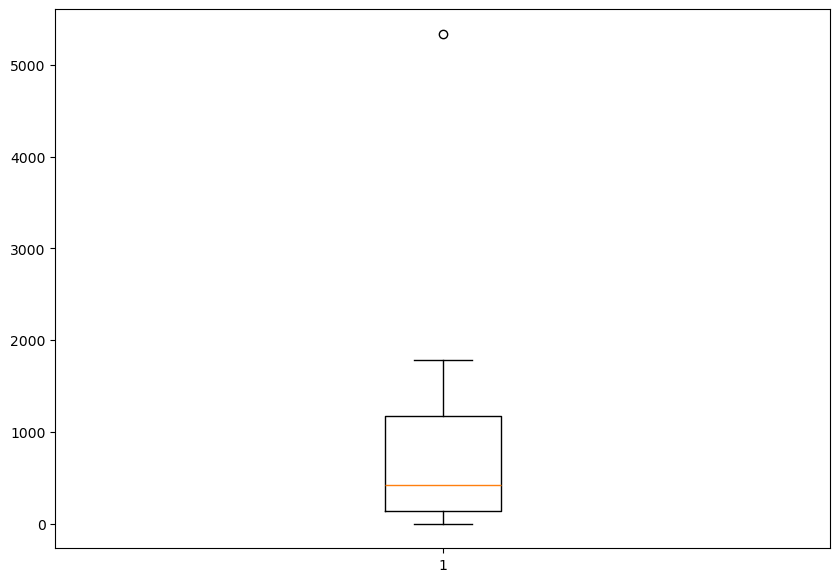

In [134]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
plt.boxplot(np.abs(coefficients))
plt.show()

по графику видно, что коэффициенты выделяются, которые больше 1000

In [149]:
pd.DataFrame(coefficients, feature_names).sort_values(by=0)

,0
y,2.36
z,52.42
table,54.70
color_E,69.49
depth,88.64
color_F,96.73
cut_Good,177.08
color_G,187.87
cut_Very Good,313.38
color_H,344.26


Видно, что признаки начинают сильно выделяться после признака color_I. 

color_I	440.77

color_J	520.42

clarity_IF	958.87

clarity_SI2	1014.17

x	1091.57

clarity_VVS1	1250.52

clarity_VVS2	1448.07

clarity_SI1	1567.64

clarity_VS1	1639.48

clarity_VS2	1783.30

carat	5336.02 

Особенно сильно выделяется карат

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [179]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
lasso.fit(X_train_scaled, y_train)

y_pred_train = lasso.predict(X_train_scaled)
y_pred= lasso.predict(X_test_scaled)

print(f"MSE test: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MSE train: {mean_squared_error(y_train, y_pred_train):.2f}\n")

coefficients = np.abs(np.round(lasso.coef_,2))
coef_dict = dict(zip(feature_names, coefficients))

print("Коэффициенты:")
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef}")


MSE test: 1332832.89
MSE train: 1334258.07

Коэффициенты:
carat: 4851.69
depth: 93.74
table: 64.99
x: 643.28
y: 0.0
z: 58.43
cut_Good: 54.28
cut_Ideal: 226.98
cut_Premium: 161.55
cut_Very Good: 147.32
color_E: 0.0
color_F: 30.9
color_G: 111.46
color_H: 271.28
color_I: 370.23
color_J: 461.83
clarity_IF: 656.23
clarity_SI1: 869.0
clarity_SI2: 405.42
clarity_VS1: 1046.69
clarity_VS2: 1101.95
clarity_VVS1: 838.19
clarity_VVS2: 965.9


In [180]:
print(f"mean of coef: {np.mean(coefficients):.2f}")
print(f"median of coef: {np.median(coefficients)}")

mean of coef: 583.97
median of coef: 271.28


MSE стало больше

Было на линейной регресии

MSE на тестовой выборке 1277672.60

MSE на тренировочной выборке 1276429.68

Стало
MSE test: 1332832.89

MSE train: 1334258.07







Веса довольно уменьшились, что можно судить по следующим значениям среднего и медианы

Было

mean of coef: 835.19

median of coef: 427.26

Стало

mean of coef: 583.97

median of coef: 271.28

In [181]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)

y_pred_train = ridge.predict(X_train_scaled)
y_pred= ridge.predict(X_test_scaled)

print(f"MSE test: {mean_squared_error(y_test, y_pred):.2f}")
print(f"MSE train: {mean_squared_error(y_train, y_pred_train):.2f}\n")

coefficients = np.abs(np.round(ridge.coef_,2))
coef_dict = dict(zip(feature_names, coefficients))

print("Коэффициенты:")
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef}")

MSE test: 1278067.77
MSE train: 1276554.13

Коэффициенты:
carat: 5297.84
depth: 85.45
table: 54.89
x: 1040.42
y: 1.71
z: 66.8
cut_Good: 177.71
cut_Ideal: 428.58
cut_Premium: 345.43
cut_Very Good: 314.87
color_E: 69.12
color_F: 96.55
color_G: 187.37
color_H: 343.37
color_I: 439.51
color_J: 519.13
clarity_IF: 947.08
clarity_SI1: 1538.93
clarity_SI2: 989.63
clarity_VS1: 1615.43
clarity_VS2: 1755.51
clarity_VVS1: 1234.25
clarity_VVS2: 1428.74


In [182]:
print(f"mean of coef: {np.mean(coefficients):.2f}")
print(f"median of coef: {np.median(coefficients)}")

mean of coef: 825.14
median of coef: 428.58


Здесь в целом коэфициенты почти такие же как и на линейной регрессии, как и MSE, однако здесь MSE стало немного выше

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [187]:
alphas = [0.1, 1, 10, 100, 200]


lasso_coef_norm = []
ridge_coef_norm = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    lasso_coef_norm.append(np.linalg.norm(lasso.coef_))

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_coef_norm.append(np.linalg.norm(ridge.coef_))


    

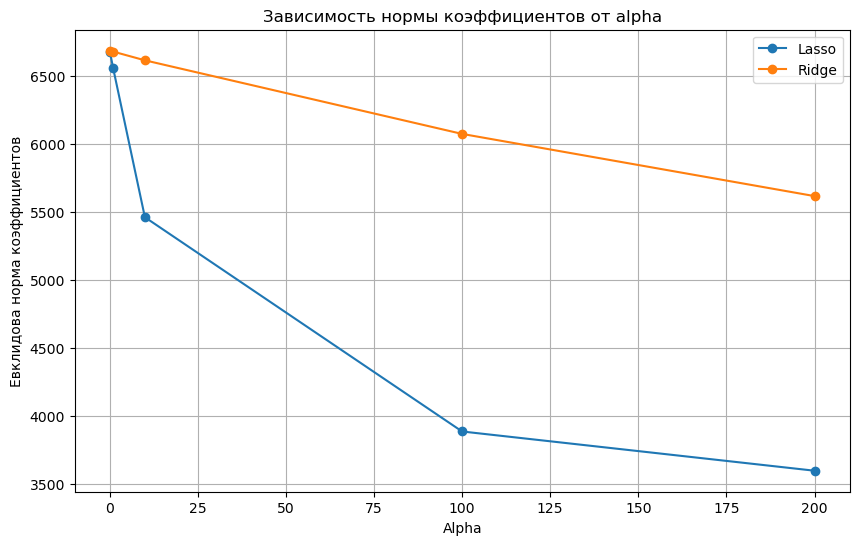

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_coef_norm, 'o-', label='Lasso')
plt.plot(alphas, ridge_coef_norm, 'o-', label='Ridge')
plt.xlabel('Alpha')
plt.ylabel('Евклидова норма коэффициентов')
plt.title('Зависимость нормы коэффициентов от alpha')
plt.legend()
plt.grid()
plt.show()

Lasso-регрессия сильнее снижает норму коэффициентов по сравнению с Ridge-регрессией. Это происходит потому, что Lasso добавляет штраф в виде L1-нормы (сумма абсолютных значений коэффициентов), что приводит к обнулению некоторых коэффициентов. В результате норма вектора коэффициентов уменьшается более значительно.

Lasso-регрессия обнуляет коэффициенты для менее важных признаков, что делает её полезной для отбора признаков. Это происходит из-за свойства L1-регуляризации
В результате Lasso автоматически выполняет отбор признаков, оставляя только те, которые наиболее важны для предсказания целевой переменной. 

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV

alphas = [0.1, 1, 10, 100, 200]

lasso_cv = LassoCV(alphas=alphas, cv = 5, random_state= 8)
lasso_cv.fit(X_train_scaled, y_train)
mse_path = lasso_cv.mse_path_
mse_path

array([[2245146.46014907, 2010388.46568261, 2248986.41767904,
        2153826.10365584, 2174421.04478141],
       [1865739.85125655, 1673953.17810976, 1869760.37357149,
        1782263.96942193, 1783971.38305743],
       [1405461.5559555 , 1269232.87384054, 1370460.6489858 ,
        1336062.77298934, 1305992.33253115],
       [1342677.6838781 , 1212112.31560681, 1308073.02060199,
        1279832.33619257, 1261977.61618733],
       [1341080.6120196 , 1211172.38688023, 1307933.92785967,
        1284568.98941166, 1263398.75704286]])

In [194]:
mean_mse = mse_path.mean(axis=1) 
optimal_alpha = lasso_cv.alphas_[np.argmin(mean_mse)]
print(f"Оптимальное значение alpha: {optimal_alpha}")

Оптимальное значение alpha: 1.0


In [ ]:
lasso_cv.alpha_ # можно перепроверить на встроенном аттрибуте alpha, видно, что наши значения совпадают, самый лучший вариант с альфа = 1

1.0

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [204]:
lasso = Lasso(alpha=1)
lasso.fit(X_train_scaled, y_train)

coefficients = np.abs(np.round(lasso.coef_,2))
pd.DataFrame(coefficients, feature_names).sort_values(by=0)

,0
y,0.00
z,48.27
table,55.73
color_E,62.49
depth,89.83
color_F,90.10
cut_Good,164.93
color_G,180.18
cut_Very Good,296.93
cut_Premium,326.28


**Наиболее важные признаки**: carat, clarity, x.
**Признаки средней важности**: color, cut.
**Неинформативные признаки**: y.

Анализ коэффициентов

1. Неинформативные признаки

y: Коэффициент равен 0.00. данный признак не влияет на целевую переменную (цену алмаза) и может быть исключен из модели. Возможно это высота алмаза, она не так сильно влияет, так как в целом всегда будет не слишком большой на алмазе (возможно)


2. Наиболее информативные признаки


**carat**: Коэффициент 5289.14. Это самый важный признак, который сильно влияет на цену алмаза. Это логично, так как вес алмаза (в каратах) является одним из ключевых факторов при определении его стоимости.


**clarity** clarity_VS2, clarity_VS1, clarity_SI1, clarity_VVS2, clarity_VVS1: Эти признаки, связанные с чистотой алмаза, также имеют высокие коэффициенты. 

**x**: Коэффициент 1050.99. Этот признак, вероятно, связан с размером алмаза (длина), что также влияет на его стоимость.


3. Признаки средней важности

**color** color_J, color_I, color_H, color_G, color_F, color_E: Эти признаки, связанные с цветом алмаза, имеют коэффициенты от 62.49 до 514.56. Цвет алмаза также влияет на его цену, но в меньшей степени, чем вес или чистота.
**cut** cut_Ideal, cut_Premium, cut_Very Good, cut_Good: Эти признаки, связанные с качеством огранки, имеют коэффициенты от 164.93 до 407.43. Огранка важна, но её влияние меньше, чем у веса и чистоты.

Итак, можно сделать вывод что больше всего на цену алмаза влияет его вес в каратах и его чистота



**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [205]:
y_pred = lasso.predict(X_test_scaled)

print(f"MSE test: {np.round(mean_squared_error(y_test, y_pred),2)}")
mse_lasso = mean_squared_error(y_test, y_pred)

MSE test: 1278470.91


In [207]:
np.round(mse_linreg - mse_lasso)

-798.0

Видно, что разница между MSE между линейной регрессией и Лассо-регрессией составляет -798, что означает, что результат средней квадратичной ошибки меньше у линейной регрессии, чем у регрессии с лассо. Это может означать, что обнуленный признак y возможно все таки имеет значение и его отсутствие ухудшает модель. 


Однако разница MSE небольшая, поэтому кажется, что лучше выбирать Lasso, так как таким образом модель станет проще, и будет меньший риск переобучения. Так как Лассо регрессия делает Л1 регуляризацию, которая обнуляет ненужные признаки, возможно можно посмотреть другие альфа в кросс валидации, которые возможно лучше бы подошли для лассо модели.